# 1 Setup

Importing a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. 

Check that Python 3.5 or later is installed

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Importing useful libraries
import numpy as np
import os
import copy

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 2 Binary Classification

Read the contents of training.csv and testing.csv. It is assumed that both datasets are present in the root directory of this project

In [2]:
import pandas as pd

testing_data = pd.read_csv('testing.csv')
training_data = pd.read_csv('training.csv')

## 2.1 Display the first lines and visualise dataset

### 2.1.1 Display the Training Dataset

In [3]:
# Displaying the first 5 rows of the dataset
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
training_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


**TO DO describe the cells below** - watch the lecture on this part?

### 2.1.2 Displaying the Testing Dataset

In [5]:
# Displaying the first 5 rows of the dataset
testing_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [6]:
testing_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


## 2.2 Simplifying the Classification Task

In order to simplify the classification task, the following scripts will delete all columns whose names begins with pred_minus_obs. This will leave 9 columns (features) for the training and test sets. 

In [7]:
features = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9']
training_data = training_data[['class'] + features]
testing_data = testing_data[['class'] + features]

In [8]:
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


## 2.3 Visualizing the Data

### 2.3.1 Visualizing the Training Set

Saving figure attribute_histogram_plots_training


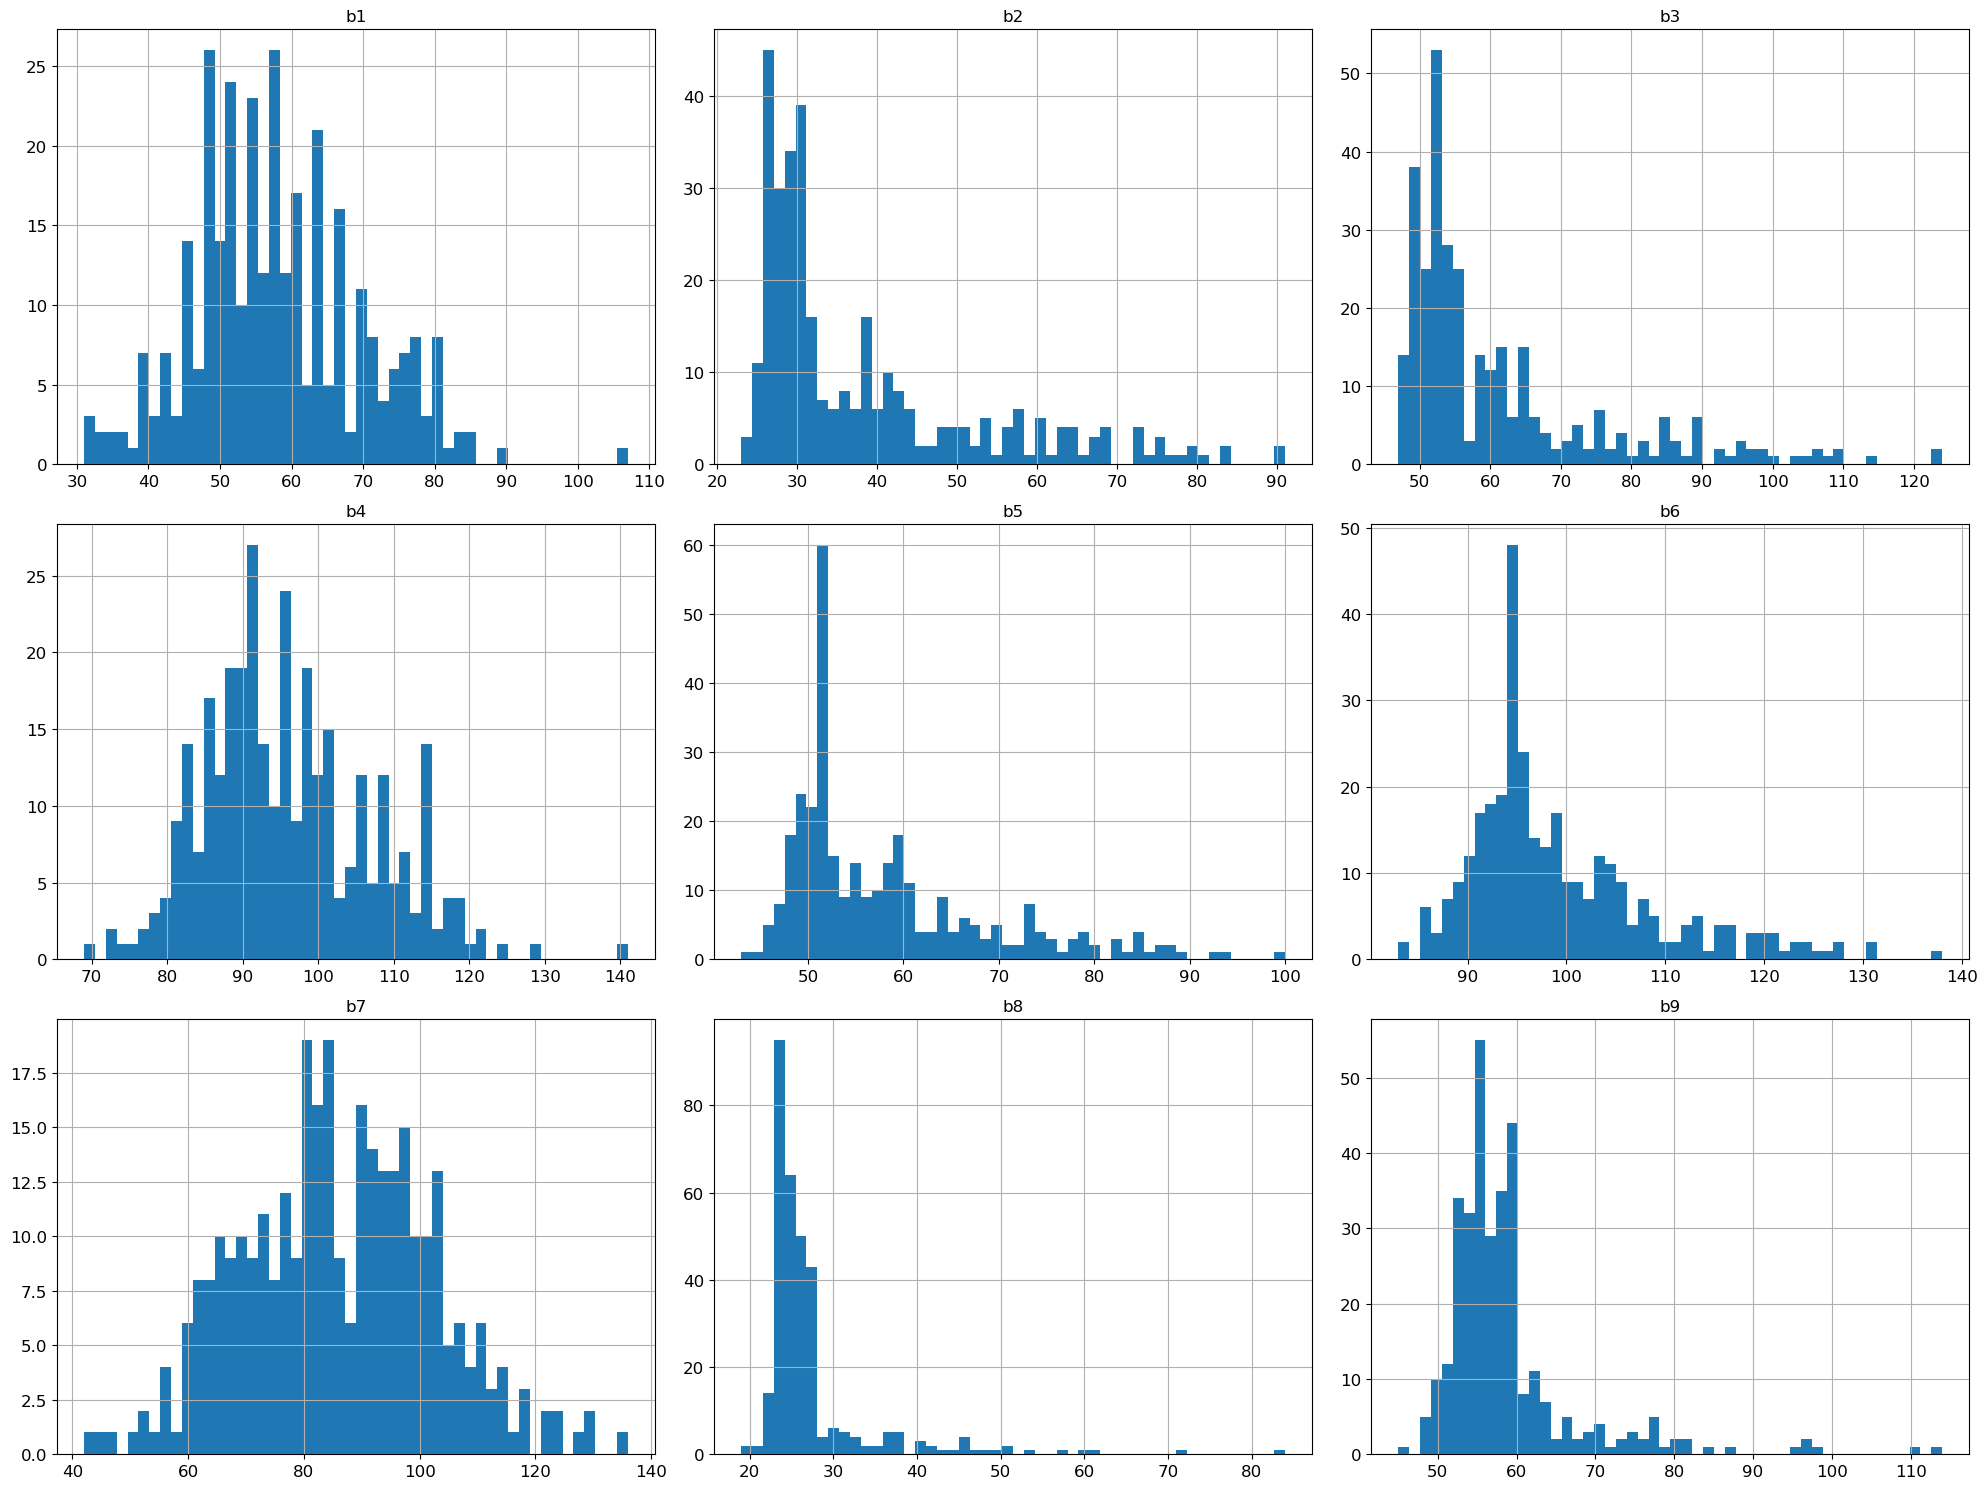

In [9]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
training_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_training")
plt.show()

The majority of the histograms for each attribute are bell shaped. However, each arrtibute is skewed either to the left or the right.

### Visualizing the Testing Set

Saving figure attribute_histogram_plots_testing


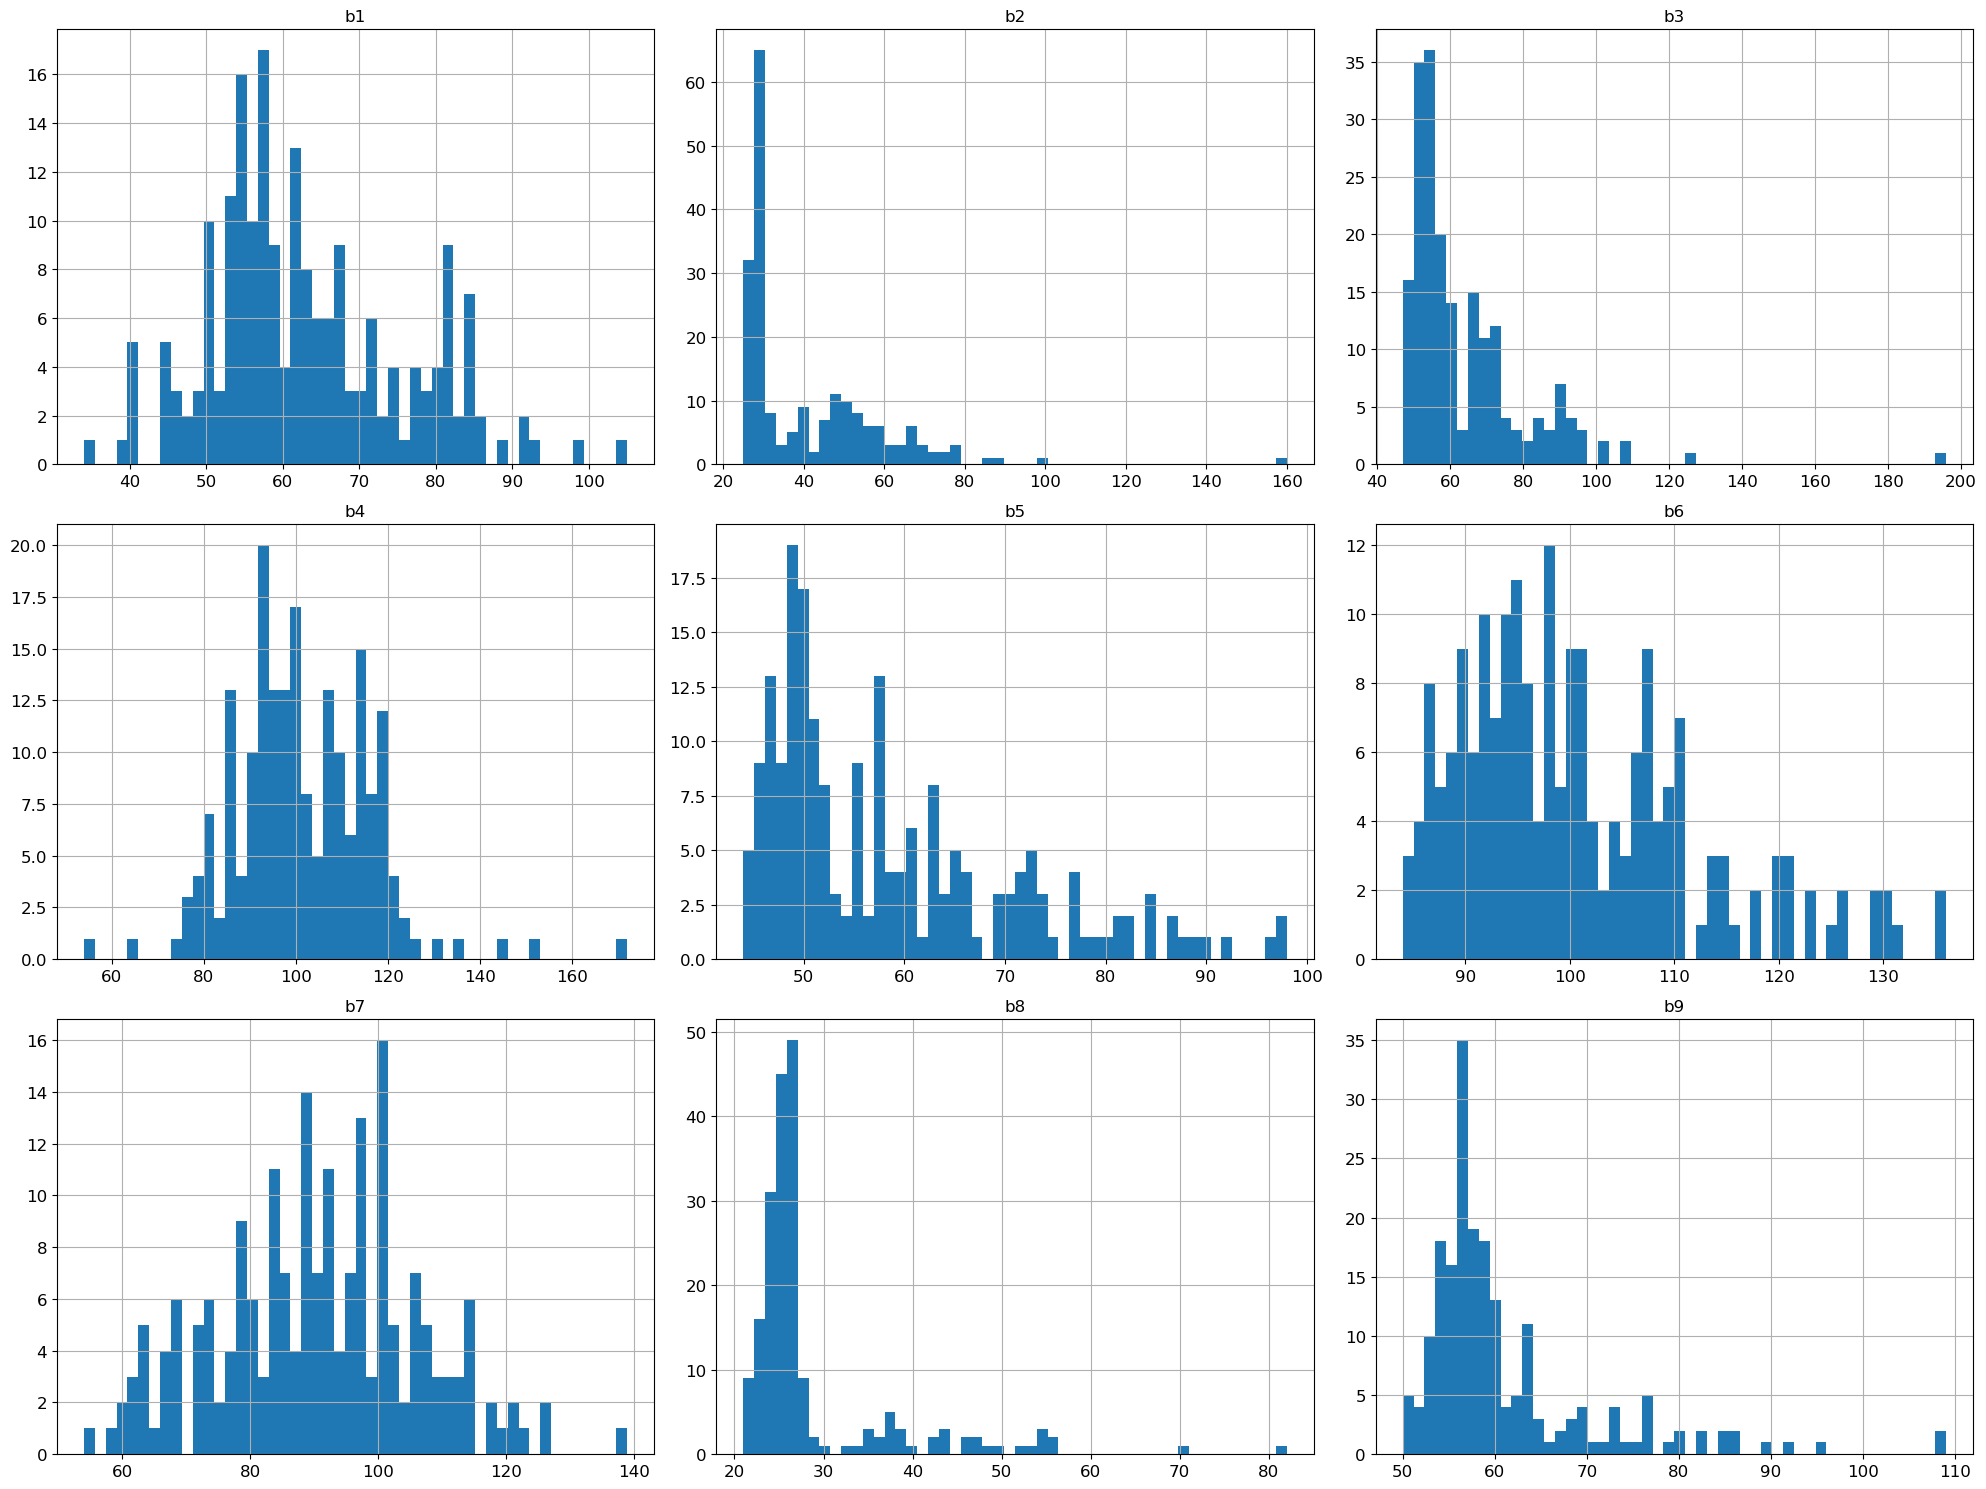

In [10]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
testing_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_testing")
plt.show()

## 2.4 Counting Instances

The following code counts the number of instances for each class label in order to determine if we have a balanced dataset. We can view the output of the count_instances() function to determine the number of non-null instances in the dataset.

It can be observed that the training data has an abundance of values for the s and d class label but a significantly lower proportion for values in the o and h class label.

The testing data is more balanced in terms of s, d and h. However, it is also lacking in values for o. 

In [11]:
testing_data["class"].value_counts()

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [12]:
training_data["class"].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

## 2.5 Feature Scaling

The following code performs appropirate feature scaling on the datasets before doing the classification. The StandardScaler function from the sklearn.preprocessing package is used for this purpose. Standardization scales the data to have a mean value of 0 and standard deviation of 1. This makes it more useful for the classification tasks that we are about to attempt.

In [13]:
# Removing the class column from the data before scaling
training_num = training_data.drop(["class"], axis=1)
testing_num = testing_data.drop(["class"], axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of standard scaler
scaler_1 = StandardScaler()

S_training = scaler_1.fit_transform(training_num)
S_testing = scaler_1.fit_transform(testing_num)

In [15]:
# Scaled training data
training_X = pd.DataFrame(S_training, columns=training_num.columns)
training_y = training_data["class"]

# Scaled testing data
testing_X = pd.DataFrame(S_testing, columns=testing_num.columns)
testing_y = testing_data["class"]

## 2.6 Logistic Regression Classifer 

In this section we will be using the logistic regression classifier found in sklearn.linear model to perform binary classification using examples from two classes: 's' and 'd'

In [16]:
from sklearn.preprocessing import OrdinalEncoder

def pre_process_data(feature_bin):
    # New scaler
    scaler_func = StandardScaler()

    # Preparing training data
    train_X_func = copy.deepcopy(training_data)
    # Removes all instances of classes not s or d
    train_X_func = train_X_func[train_X_func['class'].isin(['s', 'd'])]
    train_y_func = train_X_func['class']
    # Removes all but the feature we want
    train_X_func = train_X_func[feature_bin]

    train_X_func = scaler_func.fit_transform(train_X_func.values)
    
    # Preparing testing data
    test_X_func = copy.deepcopy(testing_data)
    # Removes all instances of classes not s or d
    test_X_func = test_X_func[test_X_func['class'].isin(['s', 'd'])]
    test_y_func = test_X_func['class']
    # Removes all but the feature we want
    test_X_func = test_X_func[feature_bin]

    test_X_func = scaler_func.transform(test_X_func.values)
    
    # Creating an instance of the orginal encoder
    ordinal_encoder_func = OrdinalEncoder()

    train_y_func = ordinal_encoder_func.fit_transform(train_y_func.values.reshape(-1,1)) 
    test_y_func = ordinal_encoder_func.fit_transform(test_y_func.values.reshape(-1,1)) 
    
    return train_X_func, train_y_func, test_X_func, test_y_func

In [102]:
import random

def plot_graph(feature_bin, X, y, dec_bound, flag):
    plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
    plt.plot(X, y[:,0], "b--", linewidth=2,
             label="Not s proba")
    plt.plot(X, y[:,1], "g-", linewidth=2, label="s proba")
    plt.plot([dec_bound, dec_bound], [0, 1], "k:", linewidth=2,
             label="Decision boundary")

    # extra code – this section beautifies and saves Figure 4–23
    plt.arrow(x=dec_bound, y=0.92, dx=0.3, dy=0,
              head_width=0.05, head_length=0.1, fc="b", ec="b")
    plt.arrow(x=dec_bound, y=0.08, dx=-0.3, dy=0,
              head_width=0.05, head_length=0.1, fc="g", ec="g")
    
    if flag == 'Y':
        test_vals_x = np.zeros(shape=(10,1))
        test_vals_y = np.empty(shape=(10,1))
        
        for idx in range(10):
            value = random.randint(0,test_X.size - 1)
            test_vals_x[idx] = test_X[value]
            test_vals_y[idx] = test_y[value]
        
        plt.plot(test_vals_x[test_vals_y == 0], test_vals_y[test_vals_y == 0], "bs")
        plt.plot(test_vals_x[test_vals_y == 1], test_vals_y[test_vals_y == 1], "g^")
    
    plt.xlabel(feature_bin)
    plt.ylabel("Probability")
    plt.legend(loc="center right")
    plt.axis([-5, 5, -0.1, 1.1])
    plt.grid()
    save_fig("logistic_regression_plot")

    plt.show()

### 2.6.1 Binary Classification using feature b2

This feature was chosen as the values in this data set follow a normal distribution

In [18]:
from sklearn.linear_model import LogisticRegression

feature_bin = ['b2']
train_X, train_y, test_X, test_y = pre_process_data(feature_bin)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(train_X, train_y.ravel())
# log_reg.fit(train_X.values, train_y.values)

LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


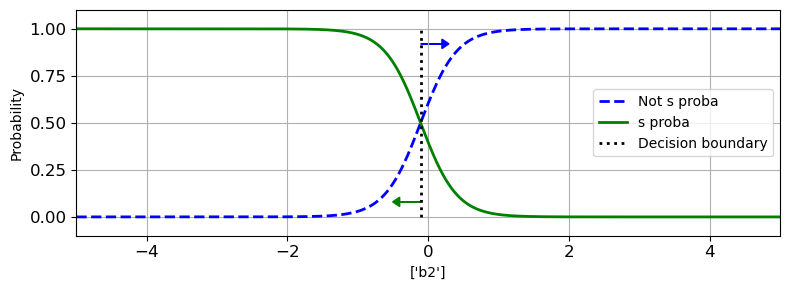

In [19]:
X_new = np.linspace(-5, 5, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] <= 0.5][0, 0]

plot_graph(feature_bin, X_new, y_proba, decision_boundary, 'N')

In [20]:
decision_boundary

-0.10510510510510507

### 2.6.2 Testing the model

Plotting estimated probabilites and decision boundary for the above model considering all features. 

Choosing 10 random instances of the testing set and add it to the plot

Saving figure logistic_regression_plot


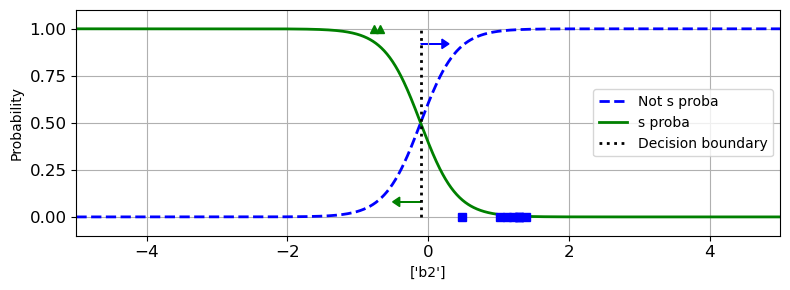

In [21]:
plot_graph(feature_bin, X_new, y_proba, decision_boundary, 'Y')

### 2.6.3 Binary Classification using feature b7

This feature was chosen as the values in this data set follow a normal distribution

In [22]:
from sklearn.linear_model import LogisticRegression

feature_bin = ['b2']
train_X1, train_y1, test_X1, test_y1 = pre_process_data(feature_bin)

log_reg1 = LogisticRegression(random_state=42)
log_reg1.fit(train_X1, train_y1.ravel())

LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


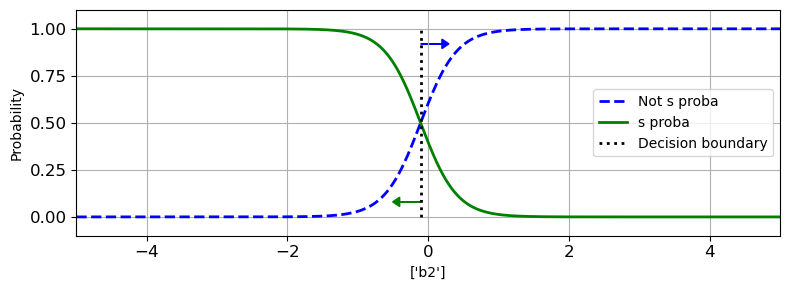

In [23]:
X1_new = np.linspace(-5, 5, 1000).reshape(-1, 1)  # reshape to get a column vector
y1_proba = log_reg1.predict_proba(X1_new)
decision_boundary1 = X1_new[y1_proba[:, 1] <= 0.5][0, 0]

plot_graph(feature_bin, X1_new, y1_proba, decision_boundary1, 'N')

In [24]:
decision_boundary1

-0.10510510510510507

Saving figure logistic_regression_plot


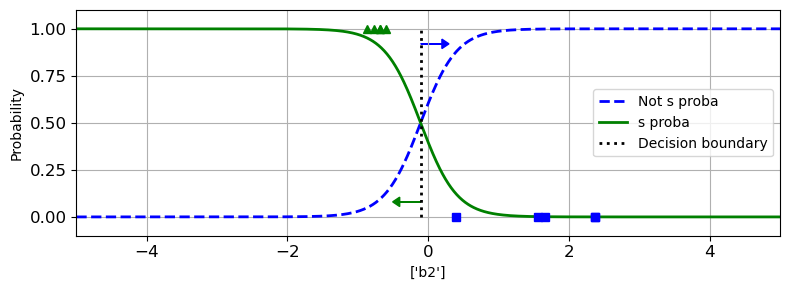

In [25]:
plot_graph(feature_bin, X1_new, y1_proba, decision_boundary1, 'Y')

## 2.7 Binary Classifier with all 9 features

Now plot the estimated probabilities and decision boundary for a model considering all features. 

In [70]:
from sklearn.linear_model import LogisticRegression

train_X3, train_y3, test_X3, test_y3 = pre_process_data(features)

log_reg3 = LogisticRegression(random_state=42)
log_reg3.fit(train_X3, train_y3.ravel())

coef_matrix = log_reg3.coef_
bias = log_reg3.intercept_

Saving figure logistic_regression_plot


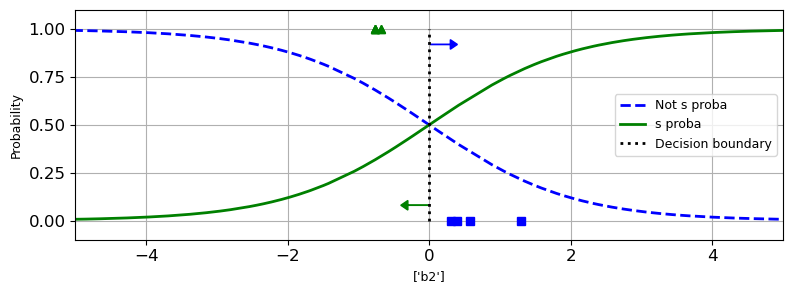

In [129]:
num_rows, num_cols = train_X3.shape
x_axis = np.zeros(shape=(num_rows,1))
y_axis = np.zeros(shape=(num_rows,1))
for idx in range(num_rows):
    x_axis[idx] = np.dot(np.atleast_2d(train_X3[idx]), coef_matrix.T) + bias

y_axis = log_reg3.predict_proba(train_X3)

x_axis, y_axis = zip(*sorted(zip(x_axis, y_axis)))

decision_boundary3 = np.array(x_axis)[np.array(y_axis)[:, 1] >= 0.49][0, 0]
plot_graph(feature_bin, np.array(x_axis), np.array(y_axis), decision_boundary3, 'Y')

# FOR THE TEST STUFF, RUN THE TEST VALUES THROUGH THE PREDICT PROBA THING THEN PLOT THEM

In [130]:
decision_boundary3

-0.001443023071687033

In [124]:
y_axis

(array([9.99999998e-01, 1.66166639e-09]),
 array([9.99999483e-01, 5.17402304e-07]),
 array([9.99998776e-01, 1.22417899e-06]),
 array([9.99998022e-01, 1.97818111e-06]),
 array([9.99996096e-01, 3.90433298e-06]),
 array([9.99994649e-01, 5.35129875e-06]),
 array([9.99988963e-01, 1.10368956e-05]),
 array([9.99975554e-01, 2.44460848e-05]),
 array([9.99964133e-01, 3.58670807e-05]),
 array([9.99954094e-01, 4.59062471e-05]),
 array([9.99942318e-01, 5.76823288e-05]),
 array([9.99900461e-01, 9.95385013e-05]),
 array([9.99881707e-01, 1.18292915e-04]),
 array([9.99879470e-01, 1.20530053e-04]),
 array([9.99879156e-01, 1.20844489e-04]),
 array([9.99805624e-01, 1.94375590e-04]),
 array([9.99749006e-01, 2.50994129e-04]),
 array([9.99713031e-01, 2.86968594e-04]),
 array([9.99588628e-01, 4.11372253e-04]),
 array([9.99535412e-01, 4.64587590e-04]),
 array([9.99494765e-01, 5.05235305e-04]),
 array([9.99288207e-01, 7.11793237e-04]),
 array([9.99117683e-01, 8.82317448e-04]),
 array([9.99117524e-01, 8.82475770

## 2.8 Precision vs Recall Curve

Plot precision versus recall and comments on the results. How does the performance measure
behave? What threshold would you choose and why?

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### 2.7.1 Precision vs Recall for Logistic Regression Classifier 1

In [131]:
y_scores = cross_val_predict(log_reg3, train_X, train_y.ravel(), cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(train_y, y_scores)
threshold = 1

Saving figure precision_recall_vs_threshold_plot


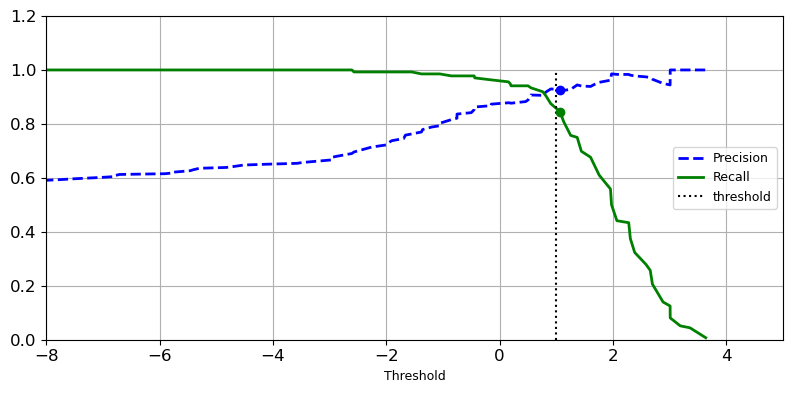

In [132]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-8, 5, 0, 1.2])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

Saving figure precision_vs_recall_plot


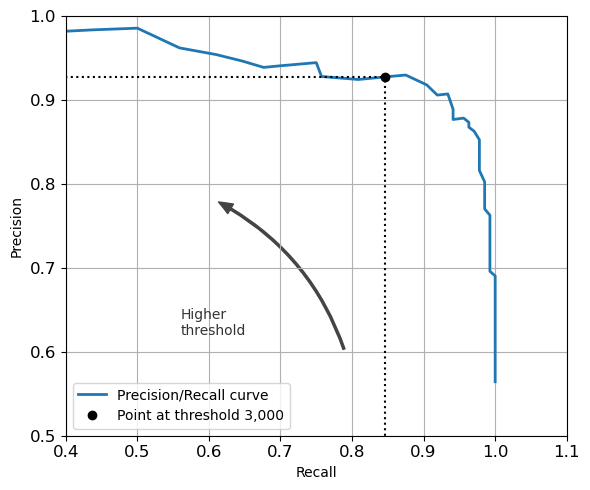

In [35]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0.4, 1.1, 0.5, 1.0])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

## 2.7 Use k-NN for the binary classification task 

Use the k-nearest neighbours (k-NN) algorithm for the same binary classification task. Try different values of k. Which value did you choose? Why?

In [36]:
from sklearn.neighbors import KNeighborsClassifier

train_X2, train_y2, test_X2, test_y2 = pre_process_data(features)

kNN = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=1)
kNN.fit(test_X2, test_y.ravel())

KNeighborsClassifier(p=1, weights='distance')

## 2.8 Comparing Logistic Regression to kNN

Confusion matrices, ROC curve and Accuracies of the kNN classifier

Saving figure roc_curve_plot


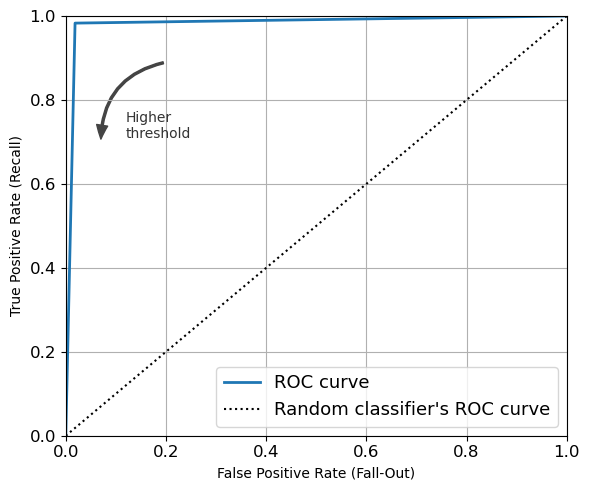

In [37]:
from sklearn.metrics import roc_curve

# ROC Curve
y_scores_kNN = cross_val_predict(kNN, test_X2, test_y.ravel(), cv=3)

fpr, tpr, threshold = roc_curve(test_y, y_scores_kNN.ravel())

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

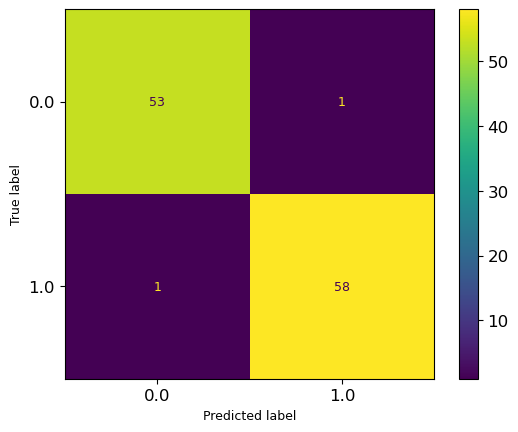

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(test_y2, y_scores_kNN)
plt.show()